In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
y = y.astype(int)

In [53]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [10]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

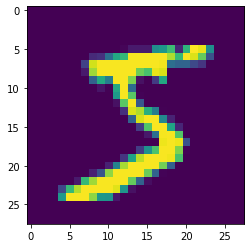

In [11]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [12]:
print(y_train[:30])
y_train_5 = (y_train == 5) #true when a y train value is 5
y_test_5 = (y_test == 5) #similar 
print(y_train_5[:30]) #check the before and after y values for the first 20 rows

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
[ True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False]


In [39]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [122]:
y_train_dict = {}
for i in y_train:
    y_train_dict['y_train_'f'{np.unique(i)}'] = np.array(y_train == i)

# print(np.unique(y_train_dict.keys()))
print(y_train_dict)
print(y_train_dict.keys())

{'y_train_[5]': array([ True, False, False, ...,  True, False, False]), 'y_train_[0]': array([False,  True, False, ..., False, False, False]), 'y_train_[4]': array([False, False,  True, ..., False, False, False]), 'y_train_[1]': array([False, False, False, ..., False, False, False]), 'y_train_[9]': array([False, False, False, ..., False, False, False]), 'y_train_[2]': array([False, False, False, ..., False, False, False]), 'y_train_[3]': array([False, False, False, ..., False, False, False]), 'y_train_[6]': array([False, False, False, ..., False,  True, False]), 'y_train_[7]': array([False, False, False, ..., False, False, False]), 'y_train_[8]': array([False, False, False, ..., False, False,  True])}
dict_keys(['y_train_[5]', 'y_train_[0]', 'y_train_[4]', 'y_train_[1]', 'y_train_[9]', 'y_train_[2]', 'y_train_[3]', 'y_train_[6]', 'y_train_[7]', 'y_train_[8]'])


In [63]:
y_train_dict['y_train_[0]']

array([[False,  True, False, ..., False, False, False]])

In [177]:
y_train_dict

{'y_train_[5]': array([ True, False, False, ...,  True, False, False]),
 'y_train_[0]': array([False,  True, False, ..., False, False, False]),
 'y_train_[4]': array([False, False,  True, ..., False, False, False]),
 'y_train_[1]': array([False, False, False, ..., False, False, False]),
 'y_train_[9]': array([False, False, False, ..., False, False, False]),
 'y_train_[2]': array([False, False, False, ..., False, False, False]),
 'y_train_[3]': array([False, False, False, ..., False, False, False]),
 'y_train_[6]': array([False, False, False, ..., False,  True, False]),
 'y_train_[7]': array([False, False, False, ..., False, False, False]),
 'y_train_[8]': array([False, False, False, ..., False, False,  True])}

In [178]:
for i in range(0,10):
    print('y_train_'f'{[i]}' ,y_train_dict['y_train_'f'{[i]}'])

y_train_[0] [False  True False ... False False False]
y_train_[1] [False False False ... False False False]
y_train_[2] [False False False ... False False False]
y_train_[3] [False False False ... False False False]
y_train_[4] [False False  True ... False False False]
y_train_[5] [ True False False ...  True False False]
y_train_[6] [False False False ... False  True False]
y_train_[7] [False False False ... False False False]
y_train_[8] [False False False ... False False  True]
y_train_[9] [False False False ... False False False]


In [188]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [189]:
sgd_clf.predict(X_test[0:25])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False])

In [196]:
len(y_train_5)

60000

In [195]:
len(y_test_5)

10000

In [197]:
y_test_dict = {}
for i in y_test:
    y_test_dict['y_test_'f'{np.unique(i)}'] = np.array(y_test == i)

# print(np.unique(y_train_dict.keys()))
print(y_test_dict)
print(y_test_dict.keys())

{'y_test_[7]': array([ True, False, False, ..., False, False, False]), 'y_test_[2]': array([False,  True, False, ..., False, False, False]), 'y_test_[1]': array([False, False,  True, ..., False, False, False]), 'y_test_[0]': array([False, False, False, ..., False, False, False]), 'y_test_[4]': array([False, False, False, ...,  True, False, False]), 'y_test_[9]': array([False, False, False, ..., False, False, False]), 'y_test_[5]': array([False, False, False, ..., False,  True, False]), 'y_test_[6]': array([False, False, False, ..., False, False,  True]), 'y_test_[3]': array([False, False, False, ..., False, False, False]), 'y_test_[8]': array([False, False, False, ..., False, False, False])}
dict_keys(['y_test_[7]', 'y_test_[2]', 'y_test_[1]', 'y_test_[0]', 'y_test_[4]', 'y_test_[9]', 'y_test_[5]', 'y_test_[6]', 'y_test_[3]', 'y_test_[8]'])


In [225]:
from typing import OrderedDict


dict1 = OrderedDict(sorted(y_train_dict.items()))
dict2 = OrderedDict(sorted(y_test_dict.items()))

In [198]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics


for i in range(0,10):
    # print('y_train_'f'{[i]}' ,y_train_dict['y_train_'f'{[i]}'])
    sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
    sgd_clf.fit(X_train, y_train_dict['y_train_'f'{[i]}'])
    sgd_clf.predict(X_test[0:25])
    # print(y_train_dict)
    y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_dict['y_train_'f'{[i]}'], cv=5)
    print(y_train_pred)
    print(metrics.confusion_matrix(y_test_dict['y_test_'f'{[i]}'], sgd_clf.predict(X_test)))
    cross_val_score(sgd_clf, X_train, y_train_dict['y_train_'f'{[i]}'], cv=5, scoring="accuracy")

[False  True False ... False False False]
[[8953   67]
 [  39  941]]
[False False False ... False False False]
[[8786   79]
 [  18 1117]]
[False False False ... False False False]
[[8919   49]
 [ 275  757]]
[ True False False ... False False False]
[[8978   12]
 [ 453  557]]
[False False False ... False False False]
[[8824  194]
 [  55  927]]
[ True False False ...  True False False]
[[8707  401]
 [ 107  785]]
[False False False ... False  True False]
[[9029   13]
 [ 272  686]]
[False False False ... False False False]
[[8902   70]
 [ 107  921]]
[False False False ... False False  True]
[[8786  240]
 [ 369  605]]
[False False False ... False False False]
[[8889  102]
 [ 422  587]]


In [232]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

df = []
for i in range(0,10):
    # print('y_train_'f'{[i]}' ,y_train_dict['y_train_'f'{[i]}'])
    sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
    sgd_clf.fit(X_train, dict1['y_train_'f'{[i]}'])
    # sgd_clf.predict(X_test[0:25])
    # print(y_train_dict)
    y_train_pred = cross_val_predict(sgd_clf, X_train, dict1['y_train_'f'{[i]}'], cv=5)
    print('Number'f'{i}')
    print(y_train_pred)
    print(metrics.confusion_matrix(dict1['y_train_'f'{[i]}'], y_train_pred))
    print(cross_val_score(sgd_clf, X_train, dict1['y_train_'f'{[i]}'], cv=5, scoring="accuracy"))
    number = 'Number'f'{i}'
    prediction = y_train_pred
    confusion_matrix = metrics.confusion_matrix(dict1['y_train_'f'{[i]}'], y_train_pred)
    accuracy = cross_val_score(sgd_clf, X_train, dict1['y_train_'f'{[i]}'], cv=5, scoring="accuracy")
    df.append([number, prediction, confusion_matrix, accuracy])

df_all_train = pd.DataFrame(df)

Number0
[False  True False ... False False False]
[[53729   348]
 [  344  5579]]
[0.98925    0.98825    0.989      0.98725    0.98858333]
Number1
[False False False ... False False False]
[[53016   242]
 [  374  6368]]
[0.98858333 0.99025    0.99066667 0.98933333 0.98983333]
Number2
[False False False ... False False False]
[[52967  1075]
 [  833  5125]]
[0.96683333 0.95933333 0.96775    0.97375    0.97333333]
Number3
[ True False False ... False False False]
[[52096  1773]
 [  993  5138]]
[0.92858333 0.94975    0.96316667 0.96108333 0.96691667]
Number4
[False False False ... False False False]
[[53283   875]
 [  823  5019]]
[0.97825    0.97225    0.96308333 0.9725     0.97241667]
Number5
[ True False False ...  True False False]
[[53115  1464]
 [  916  4505]]
[0.95466667 0.96975    0.9635     0.96533333 0.94841667]
Number6
[False False False ... False  True False]
[[53580   502]
 [  765  5153]]
[0.98375    0.97408333 0.97708333 0.9825     0.977     ]
Number7
[False False False ... Fal

In [190]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [191]:
from sklearn.model_selection import cross_val_predict
y_train_5_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [192]:
y_train_5_pred

array([ True, False, False, ...,  True, False, False])

In [33]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test_5, sgd_clf.predict(X_test)))

[[8707  401]
 [ 107  785]]


In [233]:
df_all_train

,0,1,2,3
0,Number0,"[False, True, False, False, False, False, Fals...","[[53729, 348], [344, 5579]]","[0.98925, 0.98825, 0.989, 0.98725, 0.988583333..."
1,Number1,"[False, False, False, True, False, False, True...","[[53016, 242], [374, 6368]]","[0.9885833333333334, 0.99025, 0.99066666666666..."
2,Number2,"[False, False, False, False, False, True, Fals...","[[52967, 1075], [833, 5125]]","[0.9668333333333333, 0.9593333333333334, 0.967..."
3,Number3,"[True, False, False, False, False, False, Fals...","[[52096, 1773], [993, 5138]]","[0.9285833333333333, 0.94975, 0.96316666666666..."
4,Number4,"[False, False, False, False, False, False, Fal...","[[53283, 875], [823, 5019]]","[0.97825, 0.97225, 0.9630833333333333, 0.9725,..."
5,Number5,"[True, False, False, False, False, False, Fals...","[[53115, 1464], [916, 4505]]","[0.9546666666666667, 0.96975, 0.9635, 0.965333..."
6,Number6,"[False, False, False, False, False, False, Fal...","[[53580, 502], [765, 5153]]","[0.98375, 0.9740833333333333, 0.97708333333333..."
7,Number7,"[False, False, False, False, False, False, Fal...","[[53180, 555], [768, 5497]]","[0.9803333333333333, 0.9825, 0.973333333333333..."
8,Number8,"[False, False, False, False, False, False, Fal...","[[49148, 5001], [1392, 4459]]","[0.9066666666666666, 0.9383333333333334, 0.915..."
9,Number9,"[False, False, False, False, True, False, Fals...","[[52300, 1751], [1532, 4417]]","[0.9478333333333333, 0.9349166666666666, 0.942..."
